In [58]:
import pandas as pd

from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import yaml

In [60]:
with open("../../config/config.yaml", "r") as f:
    config = yaml.safe_load(f)
config

{'genome_url': 'http://ftp.ensembl.org/pub/release-107/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa.gz',
 'annotation_url': 'http://ftp.ensembl.org/pub/release-107/gtf/homo_sapiens/Homo_sapiens.GRCh38.107.chr.gtf.gz',
 'datasets': ['gonzalobenegas/siraj_gwas_highpip'],
 'features': ['phyloP-100v',
  'phastCons-100v',
  'phyloP-241m',
  'minus_TSS_dist',
  'minus_MAF',
  'minus_MAF_popmax',
  'CADD_RawScore',
  'CADD_Annot',
  'Enformer_L2_L2',
  'Borzoi_L2_L2'],
 'feature_sets': {'Baseline': ['minus_MAF', 'minus_TSS_dist'],
  'CADD': ['CADD_Annot', 'minus_MAF', 'minus_TSS_dist'],
  'Enformer': ['Enformer_L2_L2', 'minus_MAF', 'minus_TSS_dist'],
  'Borzoi': ['Borzoi_L2_L2', 'minus_MAF', 'minus_TSS_dist'],
  'GPN-MSA': ['GPN-MSA_absLLR', 'minus_MAF', 'minus_TSS_dist'],
  'phyloP-100v': ['phyloP-100v', 'minus_MAF', 'minus_TSS_dist'],
  'phastCons-100v': ['phastCons-100v', 'minus_MAF', 'minus_TSS_dist'],
  'phyloP-241m': ['phyloP-241m', 'minus_MAF', 'minus_TSS_dist'

In [62]:
dataset_path = "gonzalobenegas/siraj_gwas_highpip"
V = load_dataset(dataset_path, split="test").to_pandas()
V

,chrom,pos,ref,alt,label
0,1,3080038,T,C,True
1,1,3774964,A,G,True
2,1,6616131,C,T,False
3,1,7665224,C,A,False
4,1,8407293,G,A,False
...,...,...,...,...,...
1778,22,47019717,G,T,False
1779,22,47990921,C,T,True
1780,22,50007172,T,C,False
1781,22,50190508,G,A,True


In [63]:
all_features = []
for features in config["feature_sets"]["Ensemble"]:
    df = pd.read_parquet(f"https://huggingface.co/datasets/{dataset_path}/resolve/main/features/{features}.parquet")
    df.columns = [f"{features}_{col}" for col in df.columns]
    all_features += df.columns.tolist()
    V = pd.concat([V, df], axis=1)
V

,chrom,pos,ref,alt,label,CADD_Annot_GC,CADD_Annot_CpG,CADD_Annot_minDistTSS,CADD_Annot_minDistTSE,CADD_Annot_priPhCons,...,Borzoi_L2_L2_ATAC,Borzoi_L2_L2_CHIP,Borzoi_L2_L2_RNA,GPN-MSA_absLLR_score,phyloP-100v_score,phastCons-100v_score,phyloP-241m_score,minus_TSS_dist_minus_tss_dist,minus_MAF_score,minus_MAF_popmax_score
0,1,3080038,T,C,True,0.570,0.093,10827,106554,0.001,...,0.840852,9.752006,1.061627,0.265625,-3.572,0.000,-2.697,-10826,-0.263970,-0.098651
1,1,3774964,A,G,True,0.616,0.053,2139,425,0.003,...,1.696545,17.641531,7.284476,0.366699,-3.552,0.000,-0.078,-2138,-0.303582,-0.476484
2,1,6616131,C,T,False,0.576,0.133,2369,6515,0.001,...,0.503357,7.281210,1.125815,0.084473,-2.484,0.000,-0.943,-1523,-0.279001,-0.337021
3,1,7665224,C,A,False,0.662,0.080,403,842,0.029,...,0.575892,5.621067,1.535668,2.230469,2.230,0.028,-0.031,-402,-0.300167,-0.385941
4,1,8407293,G,A,False,0.497,0.013,16127,41417,0.075,...,0.813058,9.269770,2.847146,1.397461,0.181,0.000,1.230,-16372,-0.268487,-0.322186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,22,47019717,G,T,False,0.556,0.053,245790,154367,0.010,...,0.245694,3.306631,0.376174,0.123779,-3.297,0.000,-2.979,-245789,-0.416963,-0.341193
1779,22,47990921,C,T,True,0.417,0.027,304318,22898,0.991,...,0.573875,5.801227,0.208426,1.453125,-0.330,0.617,-0.561,-498631,-0.424911,-0.446343
1780,22,50007172,T,C,False,0.397,0.000,5488,15361,0.014,...,1.756246,16.996849,2.460153,0.938965,-0.431,0.000,-0.431,-5592,-0.457534,-0.239094
1781,22,50190508,G,A,True,0.728,0.120,91,8968,0.036,...,4.802217,61.971668,15.439353,1.195312,0.408,0.022,0.752,-89,-0.044884,-0.064927


In [76]:
clf = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    (
        'random_forest',
        RandomForestClassifier(
            class_weight="balanced",
            n_estimators=10000,
            random_state=42,
            n_jobs=-1,
            verbose=1,
        )
    )
])
clf.fit(V[all_features], V.label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 10000 out of 

Pipeline(steps=[('imputer', SimpleImputer()),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=10000, n_jobs=-1,
                                        random_state=42, verbose=1))])

In [77]:
# get feature importances
importances = pd.DataFrame({
    "feature": all_features,
    "importance": clf.named_steps["random_forest"].feature_importances_
}).sort_values("importance", ascending=False)
importances

,feature,importance
95,minus_MAF_score,0.048624
85,Borzoi_L2_L2_CAGE,0.034648
86,Borzoi_L2_L2_DNASE,0.033224
96,minus_MAF_popmax_score,0.029284
88,Borzoi_L2_L2_CHIP,0.024404
...,...,...
27,CADD_Annot_cHmm_E17,0.001312
28,CADD_Annot_cHmm_E18,0.001216
16,CADD_Annot_cHmm_E6,0.001208
29,CADD_Annot_cHmm_E19,0.000996


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='importance', ylabel='feature'>

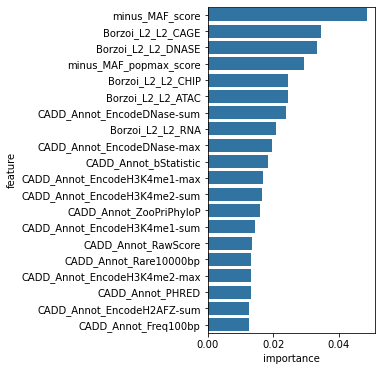

In [78]:
plt.figure(figsize=(3,6))
sns.barplot(x='importance', y='feature', data=importances.head(20), orient='h', color="C0")